Top 3 Files with the Largest Changes:
                                  Filename  HW2 Size  Current Size  Difference
146  60a7ed31813d5170240e4a2e93894ff8.html     66243         21784      -44459
330  d3391a5f7041417de0ecf85961512c5a.html     55838         98016       42178
193  840acc35b348fae02617c662b36c0d0e.html     40413         11230      -29183


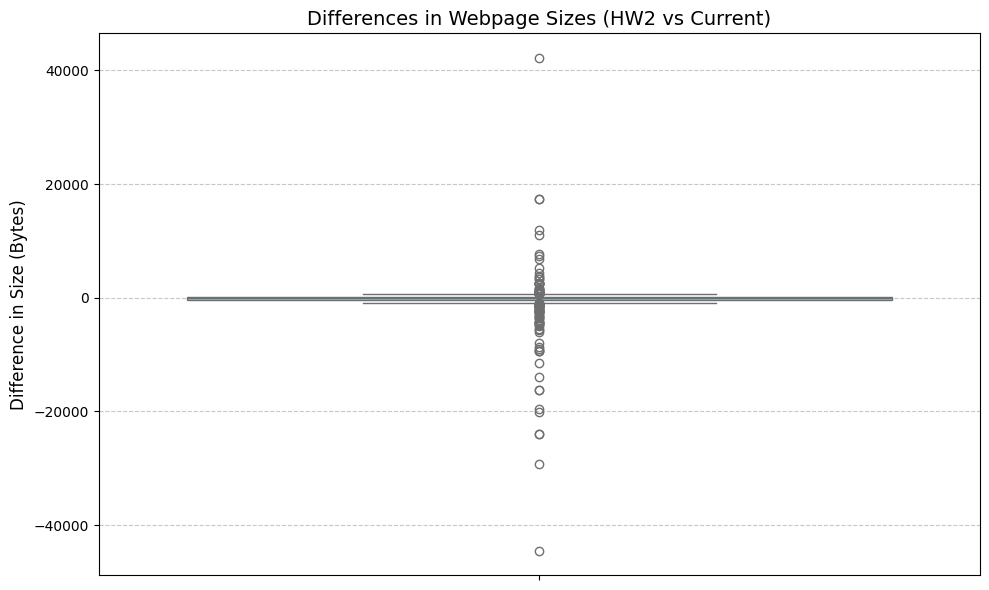

Analysis complete. Boxplot displayed and results saved to 'size_differences.csv'.
Top 3 results saved to 'top_3_size_differences.csv'.


In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

hw2_dir = "C:/Users/JHON G. BOTELLO/OneDrive - Old Dominion University/PHD/Courses/Spring 2024/Web Science/Web-Science/HW2-Ranking Webpages/Files/html_files"
current_dir = "C:/Users/JHON G. BOTELLO/OneDrive - Old Dominion University/PHD/Courses/Spring 2024/Web Science/Web-Science/HW9-Revisiting Web Archiving/FilesQ2/html_files"

def get_file_sizes(directory):
    file_sizes = {}
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            file_sizes[filename] = os.path.getsize(filepath)
    return file_sizes

hw2_sizes = get_file_sizes(hw2_dir)
current_sizes = get_file_sizes(current_dir)

size_differences = []
for filename, hw2_size in hw2_sizes.items():
    current_size = current_sizes.get(filename, 0) 
    size_differences.append({
        "Filename": filename,
        "HW2 Size": hw2_size,
        "Current Size": current_size,
        "Difference": current_size - hw2_size
    })

df_differences = pd.DataFrame(size_differences)

# Calculate Top 3 Files with the Largest Changes (absolute differences)
top_3 = df_differences.loc[abs(df_differences["Difference"]).nlargest(3).index]
print("Top 3 Files with the Largest Changes:")
print(top_3)

# Save Top 3 to a separate CSV file
top_3_csv_path = "top_3_size_differences.csv"
top_3.to_csv(top_3_csv_path, index=False)

# Plot boxplot of size differences
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_differences["Difference"], color="skyblue")
plt.title("Differences in Webpage Sizes (HW2 vs Current)", fontsize=14)
plt.ylabel("Difference in Size (Bytes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

output_csv_path = "size_differences.csv"
df_differences.to_csv(output_csv_path, index=False)

print("Analysis complete. Boxplot displayed and results saved to 'size_differences.csv'.")
print("Top 3 results saved to 'top_3_size_differences.csv'.")
